In [1]:
import datareceiver
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

In [11]:
a = datareceiver.database()
a.connect()

In [12]:
d = np.array(a.nodes())

In [13]:
result = {}
for item in d:
    # print(item['name'].lower())
    if ('env' not in item['name'].lower()) and ('acc' in item['name'].lower() or 'vel' in item['name'].lower()):
        result[item['name']] = item


In [14]:
print(len(result))
print(result.keys())
print(result['GE_RS_V_ACC'])

47
dict_keys(['GB_HSS_V_ACC', 'GB_HSS_V_VEL', 'GB_HSS_H_ACC', 'GB_HSS_H_VEL', 'GB_HSS_A_ACC', 'GB_HSS_A_VEL', 'GE_RS_V_ACC', 'GE_RS_V_VEL', 'GE_RS_H_ACC', 'GE_RS_H_VEL', 'GE_RS_A_ACC', 'GE_RS_A_VEL', 'GE_GS_V_ACC', 'GE_GS_V_VEL', 'GE_GS_H_ACC', 'GE_GS_H_VEL', 'GE_GS_A_ACC', 'GE_GS_A_VEL', 'GE_R1_V_ACC', 'GB_LOW_A_VEL', 'GB_LOW_V_VEL', 'GE_L1_V_ACC', 'GE_L1_V_VEL', 'GE_L2_V_ACC', 'GE_L2_V_VEL', 'GE_L_LOW_V_ACC', 'GE_L_LOW_V_VEL', 'GE_R_LOW_V_ACC', 'GB_LOW_H_VEL', 'GB_H_Low_LACC', 'GB_H_Low_LVEL', 'GB_V_Low_LACC', 'GB_V_Low_LVEL', 'GB_A_Low_LACC', 'GB_A_Low_LVEL', 'GB_H_Low_LACC_10Hz', 'GB_V_Low_LACC_10Hz', 'GB_A_Low_LACC_10Hz', 'MB_V_VEL', 'MB_H_VEL', 'MB_A_VEL', 'MB_H_ACC_500Hz', 'MB_V_ACC_10Hz', 'MB_A_ACC_10Hz', 'MB_H_VEL_200Hz', 'MB_H_ACC_10Hz', 'MB_V_VEL_200Hz'])
{'node': 15, 'parent': 4, 'treetype': 1, 'nodetype': 10201, 'name': 'GE_RS_V_ACC', 'status': 2177, 'active': 1}


In [15]:
import math

MB_H_VEL 82 2022-08-30 06:00:30.370000
{'id': 778210, 'node': 82, 'date': datetime.datetime(2022, 8, 30, 6, 0, 30, 370000), 'value': 0.02397741749882698, 'start_freq': 0.0, 'end_freq': 1000.0, 'sample_rate': 2560.0, 'speed': 0.0, 'speed_min': 0.0, 'speed_max': 0.0, 'speed_begin': 0.0, 'speed_end': 0.0, 'time_signal_lines': 4096, 'SpectraScaling': 1, 'SpectraEUType': 2}
{'id': 778210, 'data_type': 0, 'rawdata_type': 0, 'scale_factor': 5.767873290096759e-07, 'rawdata': array([  0.,   0.,   0., ..., 166., 264., 227.])}

9.015185952421234e-05
9.015185952421234e-05
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.57466966e-05
 1.52271855e-04 1.30930724e-04]


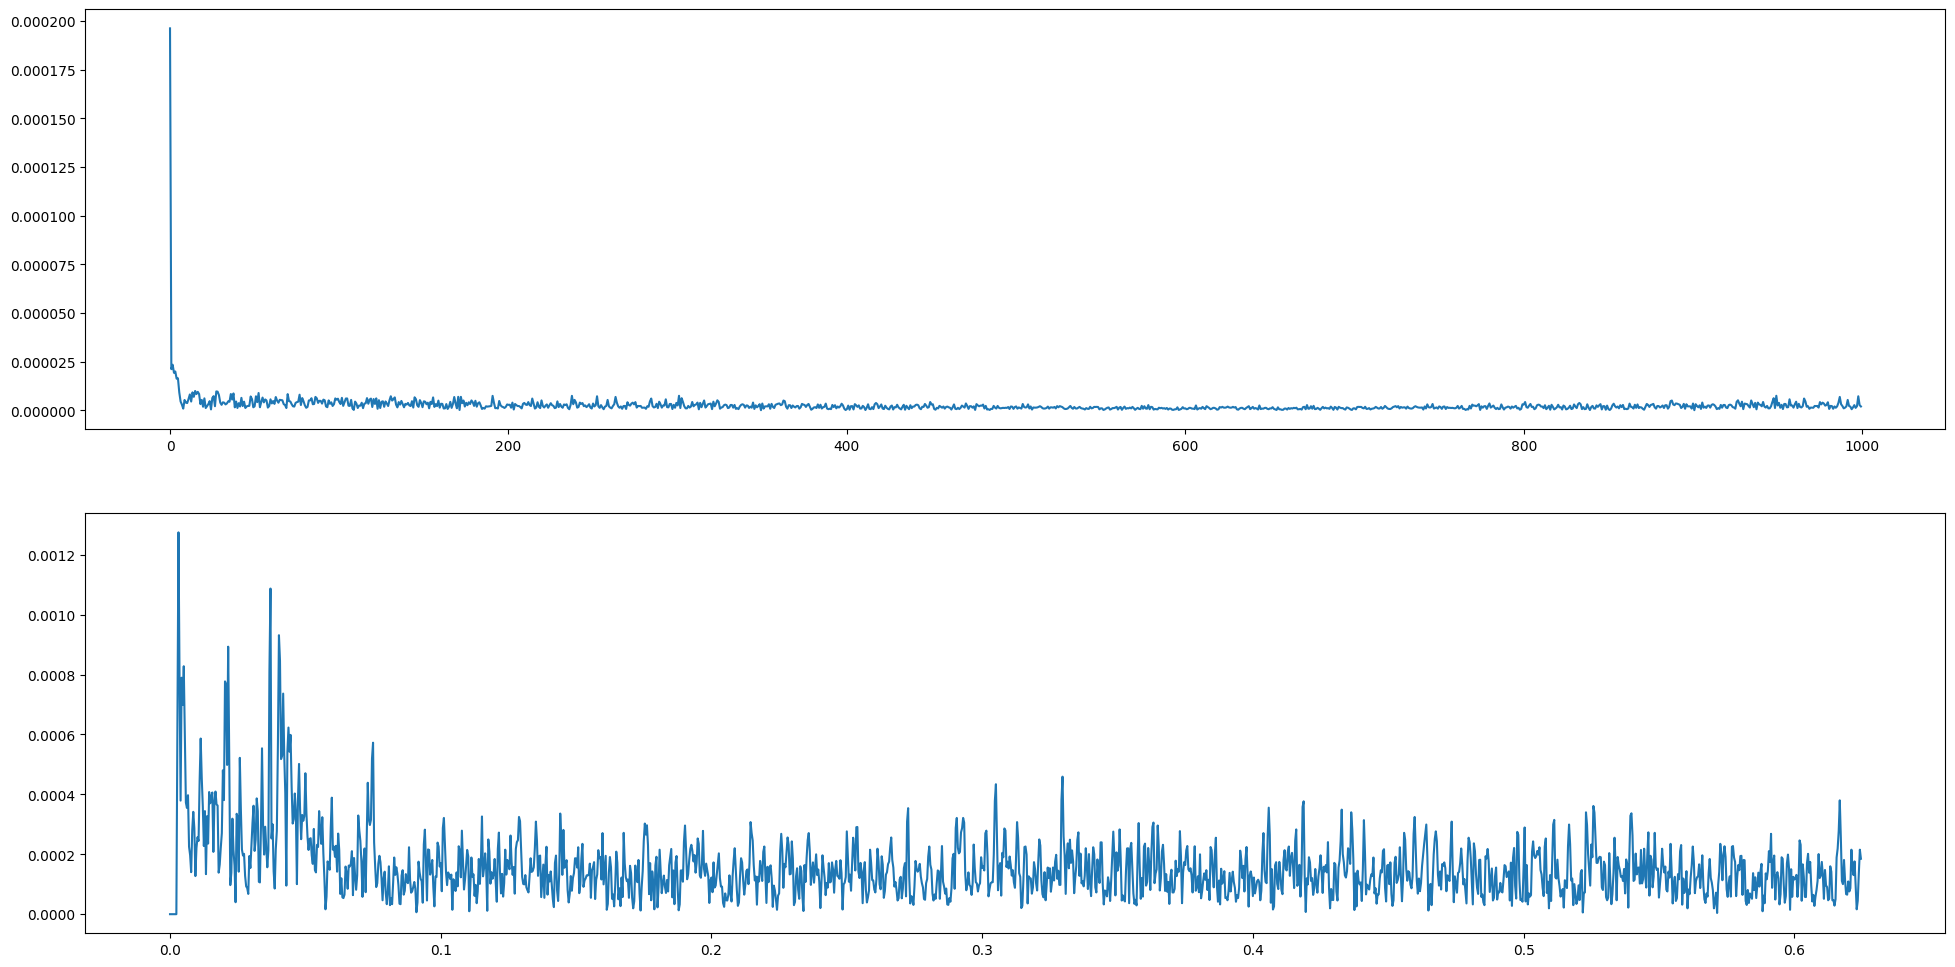

In [29]:
deviceName = 'MB_H_VEL'
timeIndex = 0
testIdx = 0

searchData = a.search(result[deviceName]['node'])
timeline = searchData[timeIndex]['time_signal_lines']
raw = a.raw(searchData[timeIndex]['id'])[testIdx]
print(deviceName, searchData[timeIndex]['node'], searchData[timeIndex]['date'])
print(searchData[timeIndex])
print(raw)
print()

print(np.max(raw['rawdata'] * raw['scale_factor'] / 10))
print(np.max(np.abs(raw['rawdata']) * raw['scale_factor'] / 10))

r = (raw['rawdata'] * raw['scale_factor']).astype('float32') 

plt.figure(figsize=(24,12))
plt.subplot(2, 1, 1)

#N = int(searchData[timeIndex]['sample_rate'])
#T = 1.0 / len(raw['rawdata'])

N = int(searchData[timeIndex]['sample_rate']) 
T = 1.0 / (searchData[timeIndex]['end_freq'] * 2)
y = r
yf = fft(y)
xf = fftfreq(N, T)[:N//2]

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]) * (math.sqrt(2)))

print(raw['rawdata'] * raw['scale_factor'])
plt.subplot(2, 1, 2)

# inner = np.arange(0, timeline) * 8
# outter = (np.arange(0, timeline * timeline) / timeline).astype('int')
# print(inner)

raw_scale = []
factor = raw['scale_factor']
for item in raw['rawdata']:
    data = item * factor 


plt.plot(np.arange(len(raw['rawdata'])) / searchData[timeIndex]['sample_rate'], raw['rawdata'] * raw['scale_factor'])
plt.show()


In [ ]:
 public float[,] Convert(Enums.CM_Scaling ScalingLocal, Enums.CM_EUType EUTypeLocal)
    {
      if (this.SpectraData == null)
        this.ConvertRawData();
      short num1 = 0;
      float num2 = 1
      short num3;
      switch (EUTypeLocal)
      {
        case Enums.CM_EUType.Other:
        case Enums.CM_EUType.AEE:
          num3 = checked ((short) unchecked ((int) num1 + 0));
          break;
    
      }
      short y;
      switch (this.m_EUType)
      {
        case Enums.CM_EUType.AEE:
          y = checked ((short) unchecked ((int) num3 + 0));
 
      }
      float num4= 1f;;
      float num5 = num * 1f;
      float[,] numArray = new float[checked (this.SpectraData.GetUpperBound(0) + 1), checked (this.SpectraData.GetUpperBound(1) + 1)];
      float num6 = (float) (2.0 * Math.PI * (double) this.m_Owner.EndFreq / (double) this.m_Owner.Spectra.Lines / 1000.0);
      int upperBound1 = this.SpectraData.GetUpperBound(0);
      int index1 = 0;
      while (index1 <= upperBound1)
      {
        int upperBound2 = this.SpectraData.GetUpperBound(1);
        int index2 = 0;
        while (index2 <= upperBound2)
        {
          numArray[index1, index2] = y < (short) 0 ? 
                    (float) ((double) num5 * (double) num2 * (double) this.SpectraData[index1, index2] / Math.Pow((double) num6 * (double) checked (index2 + 1), (double) -y)) : 
                    (float) ((double) num5 * (double) num2 * (double) this.SpectraData[index1, index2] / Math.Pow((double) num6 * (double) checked (index2 + 1), (double) y));
          checked { ++index2; }
        }
        checked { ++index1; }
      }
      return numArray;
    }
    